## Problem Statement


## Python Dependencies

The software packages required to run the code in this notebook can be imported using a [requirements.txt](requirements.txt) file. Using a requirements.txt file allows for better portability of the code in this notebook as it will mitigate against version control issues of caused by differant versions of software installed on the users machine.

The [requirements.txt](requirements.txt) file, located in the root folder of the repository, supports installation of the required libraries and software versions. Running the code in the next cell in this notebook can upgrade, downgrade or install python libraries in your development environment and should be run only if one is prepared to accept this.

In [ ]:
# modified from code found here - 
# https://sungkim11.medium.com/how-to-create-portable-jupyter-notebooks-6c1b8dabe159 - accessed 26/09/2024
!conda install --yes --file requirements.txt

The following python libraries are imported:

- [Matplotlib](https://matplotlib.org/) (https://matplotlib.org/ - last accessed 8 Nov. 2023) - is an open-source software library for creating static, animated, and interactive visualizations in Python.

- [Pandas](https://pandas.pydata.org/) (https://pandas.pydata.org/ - last accessed 26 Sept. 2024) is an open-source software library used in data analytics that allows data analysis and manipulation. Pandas is built on top of the Python programming language. A Pandas DataFrame is a dictionary like container for series objects. A DataFrame is the primary Pandas data structure.

- [Seaborn](https://seaborn.pydata.org/) (https://seaborn.pydata.org/ - last accessed 23 Nov. 2023) - is visualisation software that is built on matplotlib. It offers a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

The dataset is read in as a CSV (*comma separated value*) file.

In [2]:
data = pd.read_csv('datasets/PlantGrowth.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [4]:
# https://www.aporia.com/resources/how-to/count-nan-values-dataframe/
data.isna().sum().sum()

0

In [5]:
data['group'].value_counts()

group
ctrl    10
trt1    10
trt2    10
Name: count, dtype: int64

In [6]:
data.head(5)

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [7]:
data.tail(5)

,rownames,weight,group
25,26,5.29,trt2
26,27,4.92,trt2
27,28,6.15,trt2
28,29,5.80,trt2
29,30,5.26,trt2


In [8]:
data.describe()

,rownames,weight
count,30.000000,30.000000
mean,15.500000,5.073000
std,8.803408,0.701192
min,1.000000,3.590000
25%,8.250000,4.550000
50%,15.500000,5.155000
75%,22.750000,5.530000
max,30.000000,6.310000


In [9]:
## Data Visualisation

The *ggplot* plot stye sheet is applied. Based on The Grammar of Graphics, the [*ggplot*](https://ggplot2.tidyverse.org/) (https://ggplot2.tidyverse.org/) is a system for declaratively creating graphics. The Grammar of Graphics is a text book on data visualisation authored by [Leland Wilkinson](https://en.wikipedia.org/wiki/Leland_Wilkinson) (https://en.wikipedia.org/wiki/Leland_Wilkinson). Amongst other areas, Leland Wilkinson is recognised for his contribution to the field of data visualisation.

Some of the colors in the plots in Task 5 have been changed from the ggplot defaults, deviating from this style, as they were hard to discern especially if the viewer has color blindness.

In [10]:
# https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html [Accessed 6 Dec. 2023]
plt.style.use('ggplot')

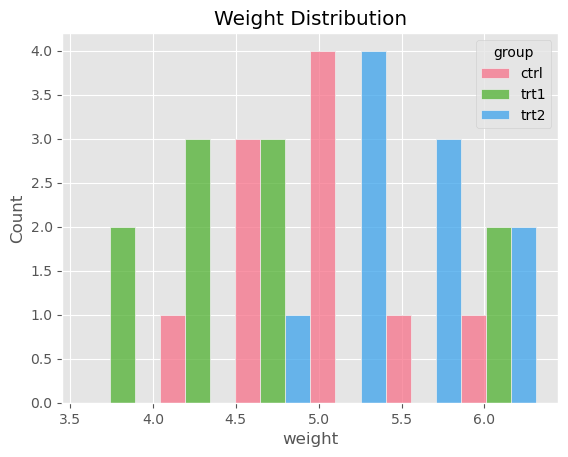

In [59]:
sns.histplot(data=data, x=data['weight'], hue='group', multiple="dodge", palette='husl').set_title('Weight Distribution')
plt.show()

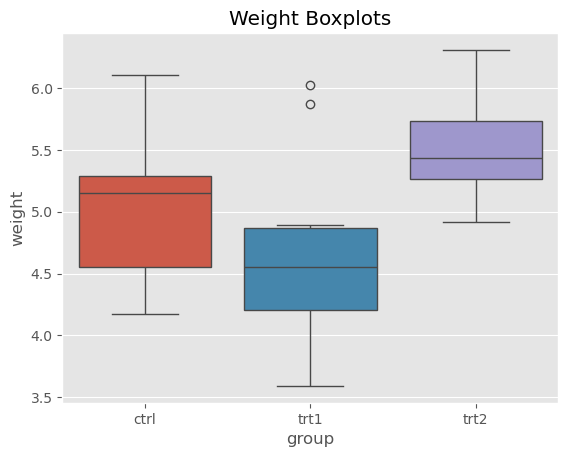

In [21]:
sns.boxplot(data=data, y=data['weight'], x='group', hue='group').set_title('Weight Boxplots')
plt.show()

## References

Khryplyvyi, A. (2022). How to Count the NaN Values in a DataFrame. [online] Aporia. Available at: https://www.aporia.com/resources/how-to/count-nan-values-dataframe/ [Accessed 26 Sep. 2024].

Kim, S. (2022). Create Jupyter Notebook that runs everywhere. [online] Medium. Available at: Create Jupyter Notebook that runs everywhere [Accessed 26 Sep. 2024].